4. Write a simple accept-reject generator in python which can generate from an arbitary function of a random variable, $f(X)$. Generate some samples for the following distributions:\
(a) $f(x)=\cos ^2(x)$\
(b) $f(x)=\sin (x)+\cos (x)+2$\
(c) $f(x)=\frac{\sin (x)+\cos (x)}{\sinh (x)+\cosh (x)}+25$

In [30]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
number_of_interation = 100000

In [32]:
class Function:
    def __init__(self, function, maximum):
        self.function = function
        self.maixmum = maximum  
        # is there a better way to find maximum? 

In [45]:
f_1 = Function(lambda x: math.cos(x) ** 2,1)
f_2 = Function(lambda x: math.cos(x) + math.sin(x) + 2, np.sqrt(2) + 2)
f_3 = Function(lambda x: (math.sin(x) + math.cos(x))/ (math.sinh(x)+math.cosh(x)) , 1)

In [46]:
fun_list = [f_1,f_2,f_3]

In [47]:
data = pd.DataFrame()
xmin = 0
xmax = np.pi/2
for no, fn in enumerate(fun_list):
    xlist =[]
    for i in range (0,number_of_interation):
        x = random.uniform(xmin, xmax)
        y = random.uniform(0, fn.maixmum)
        if fn.function(x) > fn.maixmum:
            print("Error")
        if y <= fn.function(x):
            xlist.append(x)
        else:
            xlist.append(None)
    data[f"{no}"] = xlist


    

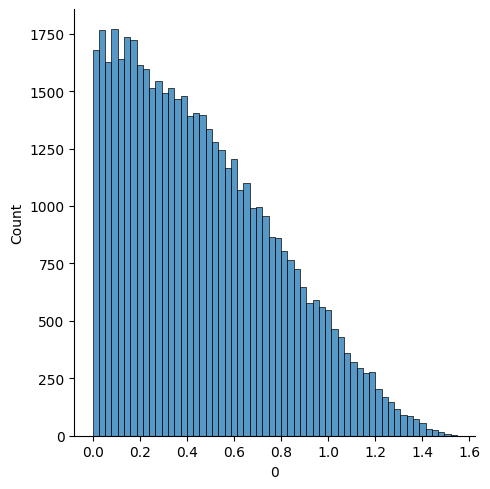

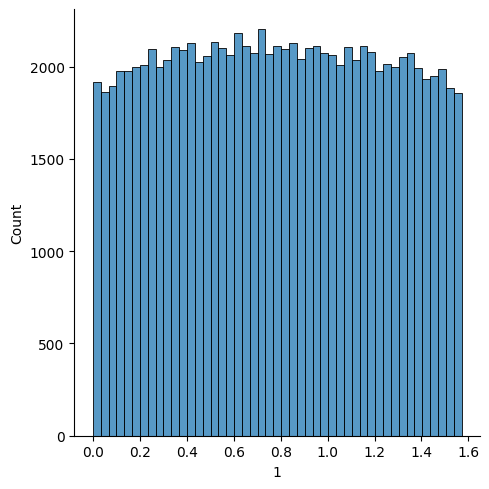

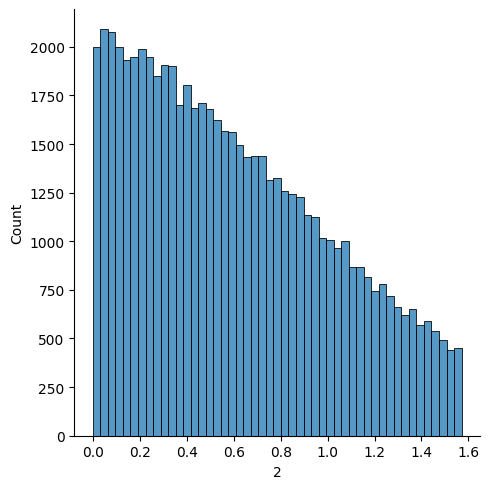

In [48]:
for i in range (0, 3):
    sns.displot(data[f"{i}"])
plt.show()

Think about how you might adapt this to work for two-dimensions and then $n$ dimensions. Can you think about ways which would speed up the generation?

Can you now make a comparison of generation efficiencies with a $1 \mathrm{D}$ normal distributions. Let's take a standard normal distribution (i.e. $\mu=0, \sigma=1$ ). Make a plot of the acceptance efficiency as a function of the generation range in terms of standard deviations. What is the approximate accept efficiency if you generate all the way out to 8 standard deviations?

In [84]:
mu = 0 
sigma = 1
max_multiplier = 8

In [87]:
normal_distribution = Function (lambda x: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)), 1)

In [90]:
data = pd.DataFrame()
for stdmultiplier in range (1,max_multiplier+1):
    xmin = - stdmultiplier * sigma
    xmax = stdmultiplier * sigma
    xlist =[] 
    for i in range (0,number_of_interation):
        x = random.uniform(xmin, xmax)
        y = random.uniform(0, normal_distribution.maixmum)
        if normal_distribution.function(x) > normal_distribution.maixmum:
            print("Error")
        if y <= normal_distribution.function(x):
            xlist.append(x)
        else:
            xlist.append(None)
    data[f"{stdmultiplier}"] = xlist

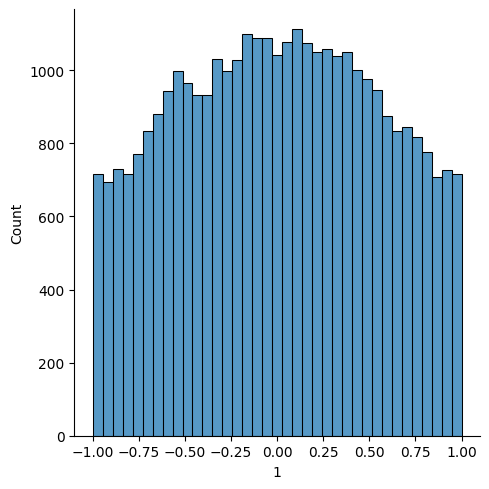

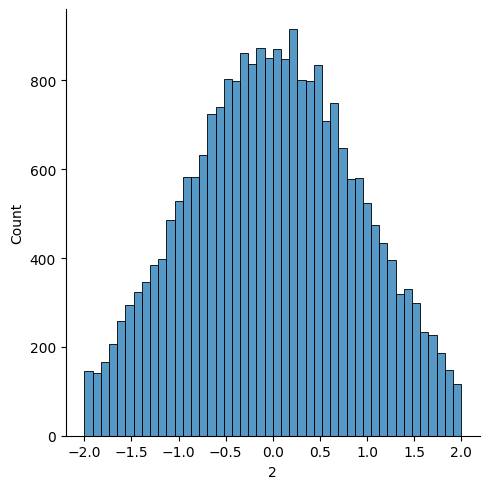

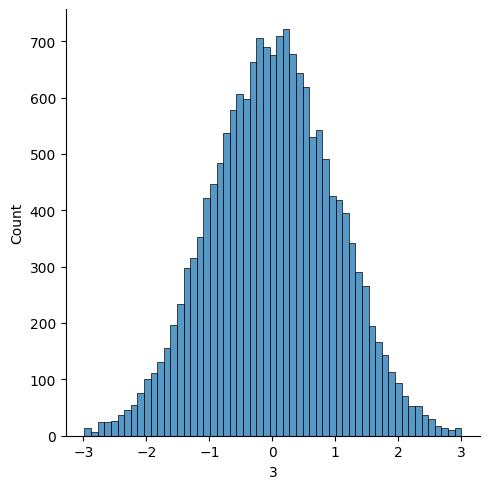

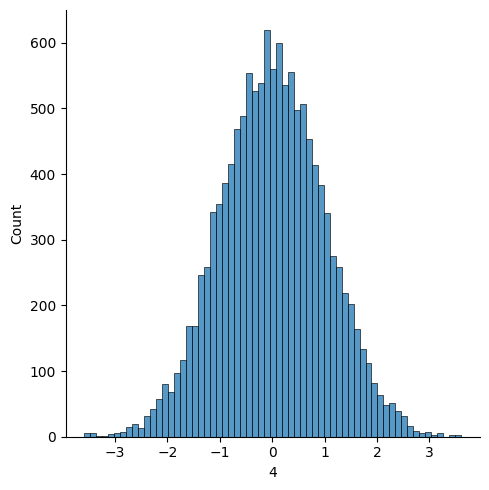

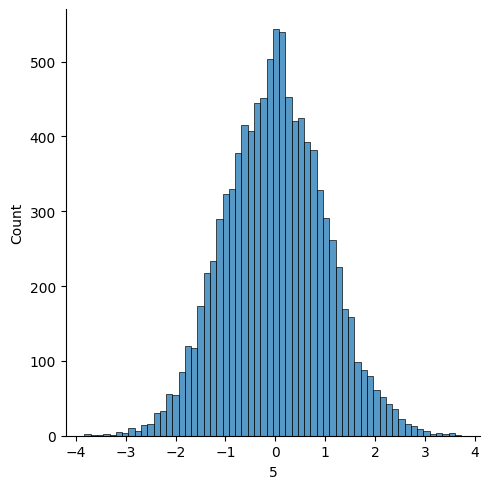

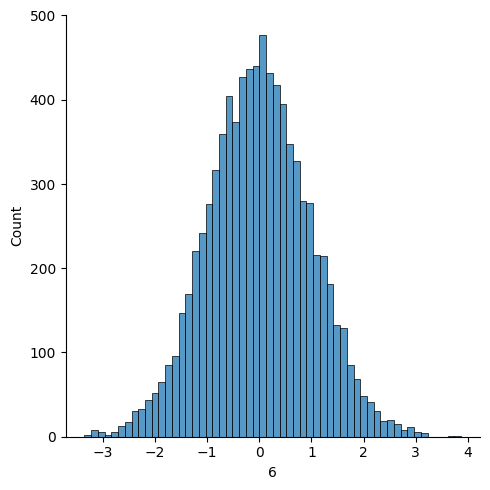

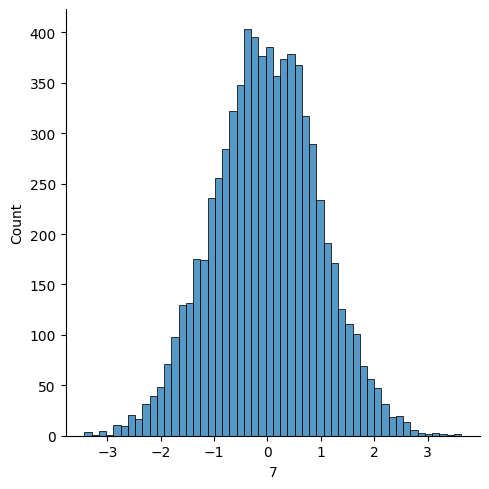

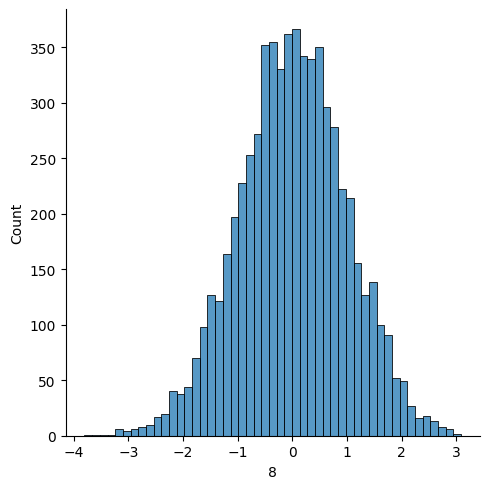

In [91]:
for i in range (1, max_multiplier+1):
    sns.displot(data[f"{i}"])

[0.3416, 0.23983, 0.16683, 0.12686, 0.09849, 0.08459, 0.07267, 0.06336]


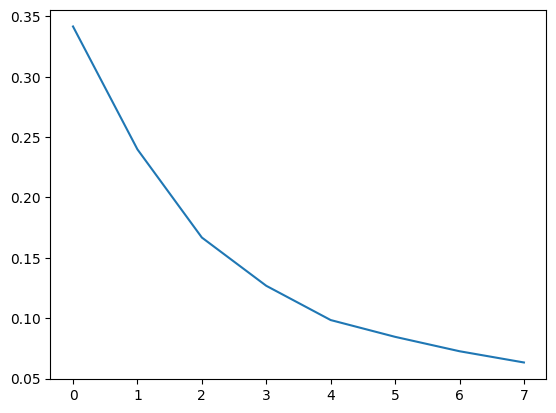

In [92]:
efficiency = [(data[f"{i}"].count())/number_of_interation for i in range(1,max_multiplier+1)]
print (efficiency)
sns.lineplot(efficiency)
plt.show()

A dataset comprises the following predictors (pred1, pred2, pred3, pred4) and the output variable, $y$ (regression_input.csv). This following exercises will assist with a thorough understanding of regression tasks